In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests

In [252]:
world_pop=pd.read_csv("Resources/world_population.csv",thousands=' ')
male_pop=pd.read_csv("Resources/population_male total.csv")
rural_population=pd.read_csv("Resources/Rural_population.csv")
female_pop=pd.read_csv("Resources/population_female.csv")
urban_population=pd.read_csv("Resources/urban_population.csv")



In [253]:
#total_pop= pd.to_numeric(world_pop["2015 [YR2015]"],downcast='float')

w2qtotal_pop_df=pd.DataFrame({"Country Code":world_pop["Country Code"],"Total Population 2015":world_pop["2015 [YR2015]"]})
male_df=pd.DataFrame({"Country Code":male_pop["Country Code"],"Male Population 2015(%)":male_pop["2015 [YR2015]"]})
female_df=pd.DataFrame({"Country Code":female_pop["Country Code"],"Female Population 2015(%)":female_pop["2015 [YR2015]"]})
rural_df=pd.DataFrame({"Country Code":rural_population["Country Code"],"Rural Population 2015(%)":rural_population["2015 [YR2015]"]})
urban_df=pd.DataFrame({"Country Code":urban_population["Country Code"],"Urban Population 2015":urban_population["2015 [YR2015]"]})

In [254]:
pop_merge1=total_pop_df.merge(male_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(female_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(rural_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(urban_df,on="Country Code", how="left")

pop_merge1.head()

,Country Code,Total Population 2015,Male Population 2015(%),Female Population 2015(%),Rural Population 2015(%),Urban Population 2015
0,WLD,7357559450,50.4386316506718,49.5613683493282,46.0820124199885,3966059373
1,AFG,33736494,51.5454421553111,48.4545578446889,75.197,8367663
2,ALB,2880703,50.4854013574818,49.5145986425182,42.566,1654503
3,DZA,39871528,50.4958588121434,49.5041411878566,29.152,28248180
4,ASM,55537,..,..,12.762,48449


In [261]:
import sys
happiness=pd.read_csv("Resources/happiness/happiness_ranking2015.csv")
happiness_population=happiness.merge(pop_merge1,on="Country Code", how="left")
happiness_population=happiness_population[happiness_population["Total Population 2015"]!=".."]
#happiness_population["Total Population 2015"]=happiness_population["Total Population 2015"]
happiness_population[pd.to_numeric(happiness_population["Total Population 2015"], errors='..').isnull()]
happiness_population=happiness_population.dropna(how="any")

0        8282396.0
1         330815.0
2        5683483.0
3        5190239.0
4       35832513.0
5        5479531.0
6       16939923.0
7        9799186.0
8        4595700.0
9       23850784.0
10       8380100.0
11       4807852.0
12       8642699.0
13     125890949.0
14     321039839.0
15     205962108.0
16        569604.0
17       4701957.0
18      11274196.0
19       9154302.0
20      65128861.0
21       4199810.0
22      31155134.0
23       5535002.0
24       3969249.0
25      81686611.0
26      17762681.0
27       2481539.0
28      66593366.0
29      43417765.0
          ...     
127      2209197.0
128     52403669.0
129      3717100.0
130     17573607.0
131     20966000.0
132     22834522.0
133      7177991.0
134     93778172.0
135     26916207.0
136     27859305.0
137     17467905.0
139       777424.0
140     40144870.0
141     14976994.0
142      1930175.0
143     19896965.0
144     15517635.0
145     53879957.0
146     24234088.0
147      4546100.0
148     14009413.0
149     1209

<function matplotlib.pyplot.show(*args, **kw)>

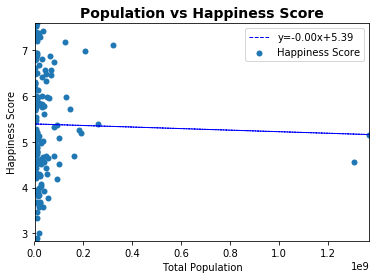

In [284]:
from matplotlib import pyplot as plt
import scipy
from scipy.stats import linregress

pop=happiness_population["Total Population 2015"].apply(lambda x: x.replace(',','')).astype(float)
#pop_norm_by_std = [number/scipy.std(pop) for number in pop]

#x_axis_pop=pop_norm_by_std
x_axis_pop=pop

# Set line
(slope_pop, intercept_pop, r_pop , p_pop, se_pop) = linregress(x_axis_pop,happiness_population["Happiness Score"] )

print(x_axis_pop)

fit_pop= slope_pop * x_axis_pop + intercept_pop

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_pop), max(x_axis_pop))
plt.ylim(min(happiness_population["Happiness Score"]),max(happiness_population["Happiness Score"]))
plt.scatter(x_axis_pop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_pop, fit_pop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_pop,intercept_pop))
plt.ylabel("Happiness Score")
plt.xlabel("Total Population")
plt.legend()

plt.show

In [263]:
pop_norm_by_std

[0.053101805814226244,
 0.0021209893719683595,
 0.036439118657747835,
 0.03327673097343133,
 0.22973679925008866,
 0.0351314995220022,
 0.10860872888158751,
 0.06282656276148646,
 0.029464899888925807,
 0.15291706656926984,
 0.05372822585442635,
 0.03082509255625296,
 0.05541185473488678,
 0.8071380223267107,
 2.058316843243001,
 1.3205067548212732,
 0.0036519626686536753,
 0.03014615668712795,
 0.07228345115393255,
 0.05869194942728927,
 0.4175675891038937,
 0.026926688252607762,
 0.1997482221067669,
 0.035487146640338606,
 0.0254484680068801,
 0.523726051609249,
 0.11388376469828852,
 0.015910154754545564,
 0.42695712567325883,
 0.2783689316373799,
 0.06761506901183824,
 0.02200107407873515,
 0.3092137713250074,
 0.4401917685257768,
 0.20232567154958236,
 0.2977766880427308,
 0.002853415603774419,
 0.025233974409433788,
 0.003546841251115797,
 0.00872010240436253,
 0.04047186115739639,
 0.10420092552535513,
 0.20066996434351675,
 0.03477419184943658,
 0.8151526071714681,
 0.327077552

0.051042784935470105
0      49.485587
1      50.171543
2      49.726835
3      50.345290
4      49.603418
5      49.212983
6      49.711550
7      49.981810
8      49.169958
9      49.839690
10     49.594398
11     50.033726
12     48.955144
13     49.787070
14     49.469968
15     49.175894
16     50.188887
17     49.597243
18     49.155456
19     73.131956
20     49.285896
21     64.839989
22     49.787053
23     49.390552
24     50.140997
25     49.183724
26     49.522429
27     75.403499
28     49.137655
29     48.932078
         ...    
127    49.413474
128    48.838467
129    47.726962
130    49.518198
131    48.174291
132    50.029825
133    48.626298
134    50.554344
135    50.529144
136    49.008990
137    50.009666
139    50.433670
140    49.725127
141    49.081808
142    51.387074
143    50.096600
144    48.774052
145    49.418896
146    49.854548
147    49.323014
148    50.046162
149    50.112517
150    50.754184
151    49.798262
152    51.545442
153    49.023668
154    49.

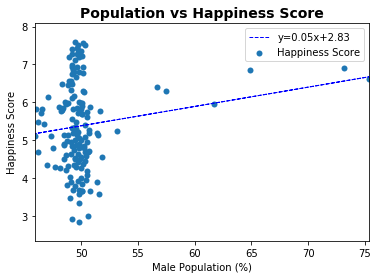

In [283]:
### Plotting with male_population data

male_pop=happiness_population["Male Population 2015(%)"].astype(float)

#male_pop_norm_by_std = [number/scipy.std(male_pop) for number in male_pop]

#x_axis_mpop=male_pop_norm_by_std

x_axis_mpop = male_pop


# Set line
(slope_mpop, intercept_mpop, r_mpop , p_mpop, se_mpop) = linregress(x_axis_mpop,happiness_population["Happiness Score"] )

print(slope_mpop)

print(x_axis_mpop)

fit_mpop= slope_mpop * x_axis_mpop + intercept_mpop


plt.title("Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_mpop), max(x_axis_mpop))
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(x_axis_mpop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_mpop, fit_mpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_mpop,intercept_mpop))
plt.ylabel("Happiness Score")
plt.xlabel("Male Population (%)")
plt.legend()

plt.show()

In [265]:
x_axis_mpop

[14.206856017909825,
 14.403787801977415,
 14.276116218574346,
 14.453668926263544,
 14.240684265913995,
 14.128594030131866,
 14.271728052221526,
 14.349317048170597,
 14.116241919779265,
 14.308515792492043,
 14.238094629324832,
 14.36422171812559,
 14.054570826763296,
 14.293409149213335,
 14.202371855763047,
 14.117945892485,
 14.40876696672421,
 14.238911515343354,
 14.112078565172162,
 20.995510548452547,
 14.14952667872404,
 18.614963411145133,
 14.293404061108092,
 14.179572226700172,
 14.395018053890938,
 14.120193813821812,
 14.217432895245329,
 21.64764985089418,
 14.106967920271297,
 14.047948591156185,
 14.106862437602997,
 13.857775159741902,
 14.133803187798138,
 14.018618923515245,
 16.2778658271844,
 14.088087331988012,
 14.401031878382973,
 16.49241583179588,
 14.416399293307787,
 14.165409604940692,
 13.507392357463088,
 14.122759075033668,
 14.304147785818767,
 13.953451334531344,
 14.026668236023946,
 14.37033122576748,
 14.352550254634755,
 17.720252830210978,
 13

<class 'pandas.core.series.Series'>
-0.051042784935469994
0      50.514413
1      49.828457
2      50.273165
3      49.654710
4      50.396582
5      50.787017
6      50.288450
7      50.018190
8      50.830042
9      50.160310
10     50.405602
11     49.966274
12     51.044856
13     50.212930
14     50.530032
15     50.824106
16     49.811113
17     50.402757
18     50.844544
19     26.868044
20     50.714104
21     35.160011
22     50.212947
23     50.609448
24     49.859003
25     50.816276
26     50.477571
27     24.596501
28     50.862345
29     51.067922
         ...    
127    50.586526
128    51.161533
129    52.273038
130    50.481802
131    51.825709
132    49.970175
133    51.373702
134    49.445656
135    49.470856
136    50.991010
137    49.990334
139    49.566330
140    50.274873
141    50.918192
142    48.612926
143    49.903400
144    51.225948
145    50.581104
146    50.145452
147    50.676986
148    49.953838
149    49.887483
150    49.245816
151    50.201738
152    

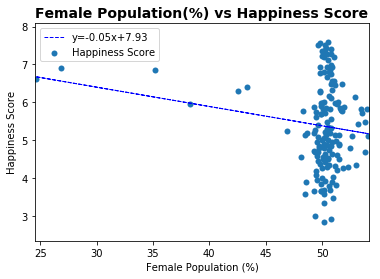

In [281]:
female_pop=happiness_population["Female Population 2015(%)"].astype(float)

x_axis_fpop=female_pop
print(type(x_axis_fpop))

# Set line
(slope_fpop, intercept_fpop, r_fpop , p_fpop, se_fpop) = linregress(x_axis_fpop,happiness_population["Happiness Score"] )

print(slope_fpop)

print(x_axis_fpop)

fit_fpop= slope_fpop * x_axis_fpop + intercept_fpop


plt.title("Female Population(%) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(female_pop-0.1), max(female_pop)+0.1,)
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(female_pop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(female_pop, fit_fpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_fpop,intercept_fpop))
plt.ylabel("Happiness Score")
plt.xlabel("Female Population (%)")
plt.legend()

plt.show()

<class 'pandas.core.series.Series'>


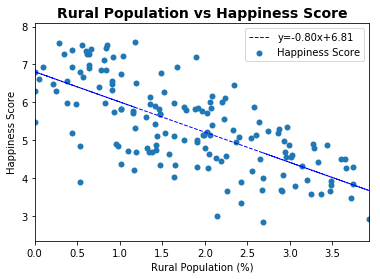

In [273]:
rural_pop=happiness_population["Rural Population 2015(%)"].astype(float)
rural_norm_by_std = [number/scipy.std(rural_pop) for number in rural_pop]
x_axis_rpop=rural_norm_by_std
print(type(x_axis_fpop))

# Set line
(slope_rpop, intercept_rpop, r_rpop , p_rpop, se_rpop) = linregress(rural_norm_by_std,happiness_population["Happiness Score"] )
#fit_rpop= slope_rpop * rural_norm_by_std + intercept_rpop


plt.title("Rural Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(rural_norm_by_std), max(rural_norm_by_std))
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(rural_norm_by_std,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(rural_norm_by_std, fit_rpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_rpop,intercept_rpop))
plt.ylabel("Happiness Score")
plt.xlabel("Rural Population (%)")
plt.legend()

plt.show()

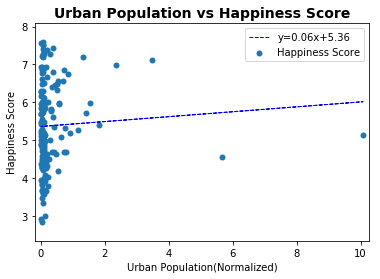

In [274]:
from matplotlib import pyplot as plt
import scipy
from scipy.stats import linregress

urban_pop=happiness_population["Urban Population 2015"].astype(float)

urban_norm_by_std = [number/scipy.std(urban_pop) for number in urban_pop]

x_axis_upop=urban_norm_by_std

#print(x_axis_fpop)

# Set line
(slope_upop, intercept_upop, r_upop , p_upop, se_upop) = linregress(urban_norm_by_std,happiness_population["Happiness Score"] )
#fit_upop= slope_upop * x_axis_upop + intercept_upop


plt.title("Urban Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(urban_norm_by_std)-0.2, max(urban_norm_by_std)+0.2)
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(urban_norm_by_std,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(urban_norm_by_std, fit_upop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_upop,intercept_upop))
plt.ylabel("Happiness Score")
plt.xlabel("Urban Population(Normalized)")
plt.legend()

plt.show()